## Data Exploration

In [43]:
# Import the important library for data preprocessing, Input-Output of dataset and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

df_train = pd.read_csv('./train.csv').drop(["Name","Ticket", "Cabin"], axis=1)
X_test   = pd.read_csv('./test.csv').drop(["Name","Ticket", "Cabin"], axis=1)

In [44]:
print (df_train.shape)
df_train.isnull().sum()

(891, 9)


PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [46]:
print (X_test.shape)
X_test.isnull().sum()

(418, 8)


PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [62]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
X_test['Age']  = X_test['Age'].fillna(X_test['Age'].mean())
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].mean())

In [63]:
df_train = df_train.replace(['male','female'],[0, 1])
df_train = df_train.replace(['Q','S','C'],[0, 1, 2])

X_test = X_test.replace(['male','female'],[0, 1])
X_test = X_test.replace(['Q','S','C'],[0, 1, 2])

In [64]:
X_train = df_train.drop(labels=["Survived"], axis=1)
y_train = df_train['Survived']

## Data Visualization

We can see that there is high correlation between "Sex and Survived", "Fare and Survived", "Embarked and Survived"

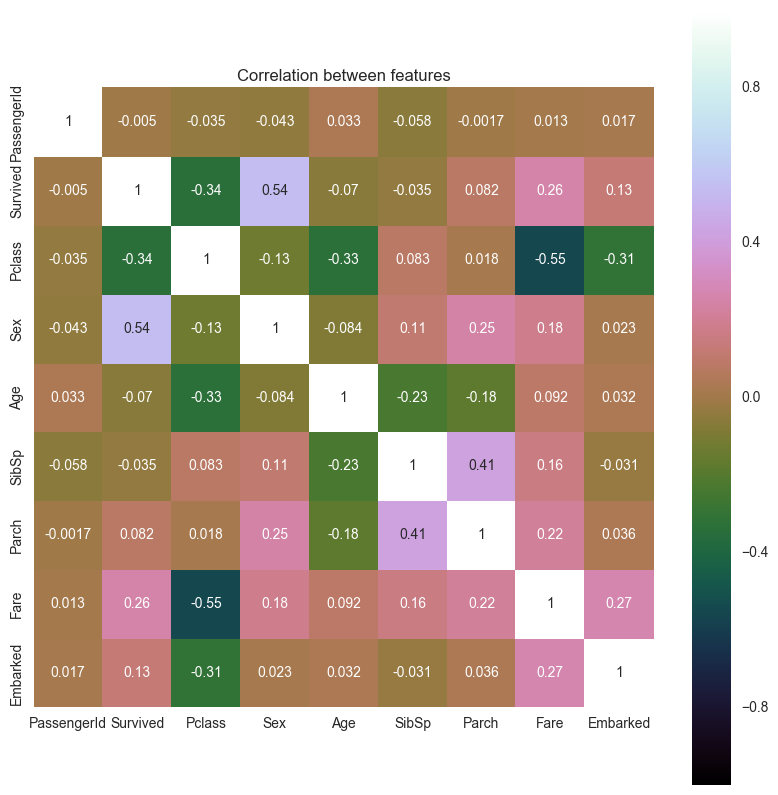

In [65]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_train.corr(), vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between features');

   Sex  Survived
0    0  0.188908
1    1  0.742038


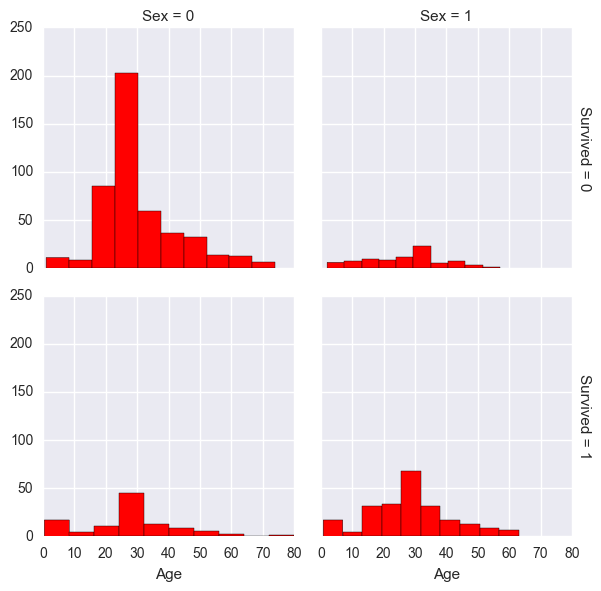

In [66]:
print (df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())
sns.FacetGrid(df_train, col="Sex", row="Survived", margin_titles=True).map(plt.hist, "Age",color="red");

   Embarked  Survived
0         0  0.389610
1         1  0.339009
2         2  0.553571


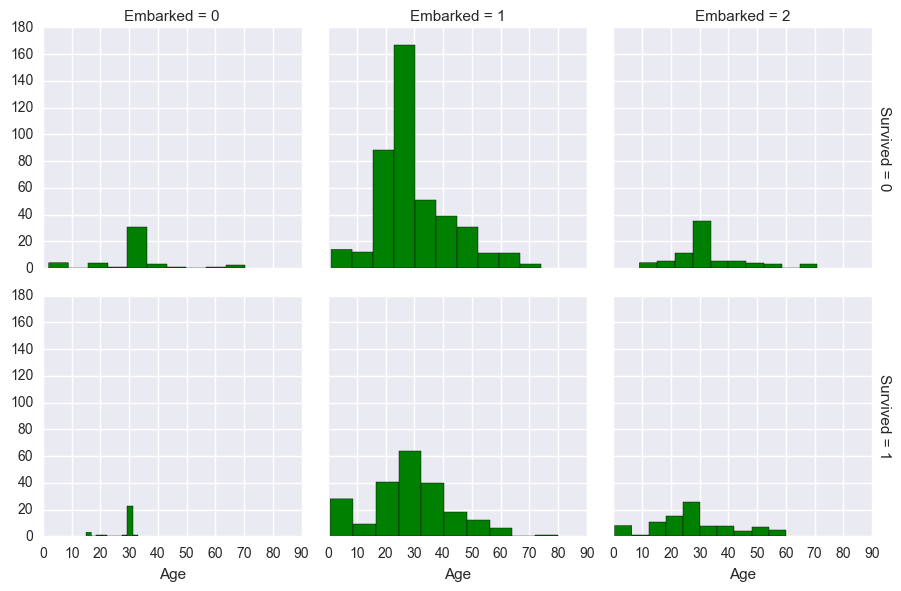

In [67]:
print (df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())
sns.FacetGrid(df_train, col="Embarked", row="Survived", margin_titles=True).map(plt.hist,"Age",color="green");

In [72]:
#Shuffle and split the dataset into the number of training and testing points
if True: 
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, train_size=0.80, random_state=42)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 712 samples.
Testing set has 179 samples.


In [73]:
# Import the models from sklearn
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

objects = ('Multi-NB', 'DTs', 'AdaBoost', 'KNN', 'RF')

In [74]:
# function to train classifier
def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)

# function to predict features 
def predict_labels(clf, features):
    return (clf.predict(features))

In [75]:
# Initialize the three models
A = MultinomialNB(alpha=1.0,fit_prior=True)
B = DecisionTreeClassifier(random_state=42)
C = AdaBoostClassifier(n_estimators=100)
D = KNeighborsClassifier(n_neighbors=3)
E = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [76]:
# loop to call function for each model
clf = [A,B,C,D,E]
pred_val = [0,0,0,0,0]

for a in range(0,5):
    train_classifier(clf[a], X_train, y_train)
    y_pred = predict_labels(clf[a],X_test)
    pred_val[a] = f1_score(y_test, y_pred,  average='binary') 
    print pred_val[a]

0.611940298507
0.699300699301
0.722222222222
0.416
0.779411764706


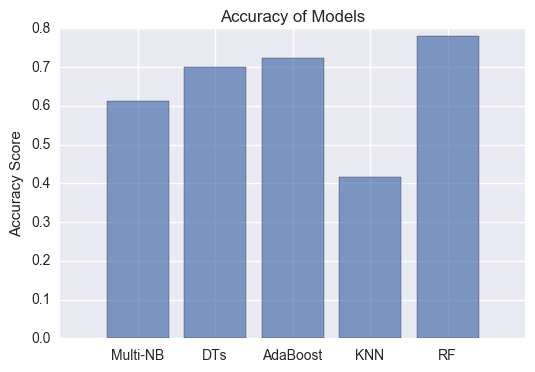

In [77]:
# ploating data for F1 Score
y_pos = np.arange(len(objects))
y_val = [ x for x in pred_val]
plt.bar(y_pos,y_val, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()